<table>
    <tr>
        <th><img src="img/rqc.png" href="http://www.rqc.ru/" width="150px"></th>
        <th colspan="3" align=left style="font-weight:normal">
            <p>• Anton Karazeev: [a.karazeev@rqc.ru](mailto:a.karazeev@rqc.ru) or [t.me/akarazeev](t.me/akarazeev)</p>
            <p>• Based on [QISKit Tutorial](https://github.com/QISKit/qiskit-tutorial)</p>
        </th>
    </tr>
</table>

# IBM Q Experience

## Введение

In [51]:
from qiskit import QuantumProgram

# Создаём объект для квантовой программы.
qp = QuantumProgram()

# Теперь необходимо указать сколько нам понадобится
# квантовых регистров (кубит) и классических регистров.
# В обоих случаях указано 2. Помимо количества им
# присваиваются идентификаторы в рамках программы
# `qp` - "qr" и "cr" соответственно.
qr = qp.create_quantum_register('qr', 2)
cr = qp.create_classical_register('cr', 2)

# Создаём квантовую цепь с квантовыми регистрами `qr`,
# классическими регистрами `cr` и называем её "Bell".
qc = qp.create_circuit('Bell',[qr],[cr])

# Начинаем добавлять различные гейты (операции над
# кубитами). Синтаксис следующий: "<квантовая_цепь>.<гейт>
# (<квантовый/классический регистр, параметры, etc. - в
# зависимости от гейта>)".

# Гейт Адамара на нулевой кубит.
qc.h(qr[0])
# Controlled NOT (CNOT) гейт, который использует `qr[0]`
# кубит как управляющий, а кубит `qr[1]` как таргет.
qc.cx(qr[0], qr[1])
# Измерить нулевой кубит и записать измеренное значение в
# нулевой регистр.
qc.measure(qr[0], cr[0])
# Измерить `qr[1]` и записать в `cr[1]`. 
qc.measure(qr[1], cr[1])

# Запустить выполнение программы "Bell" на бэкэнде
# (дефолтно программы запускаются на симуляторе
# "local_qasm_simulator").
result = qp.execute('Bell')

# Посмотреть на результаты программы в виде "{'00': n1,
# '01': n2, ...}", где n1, n2, ... - число
# соответствующих исходов.
print(result.get_counts('Bell'))

{'00': 528, '11': 496}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


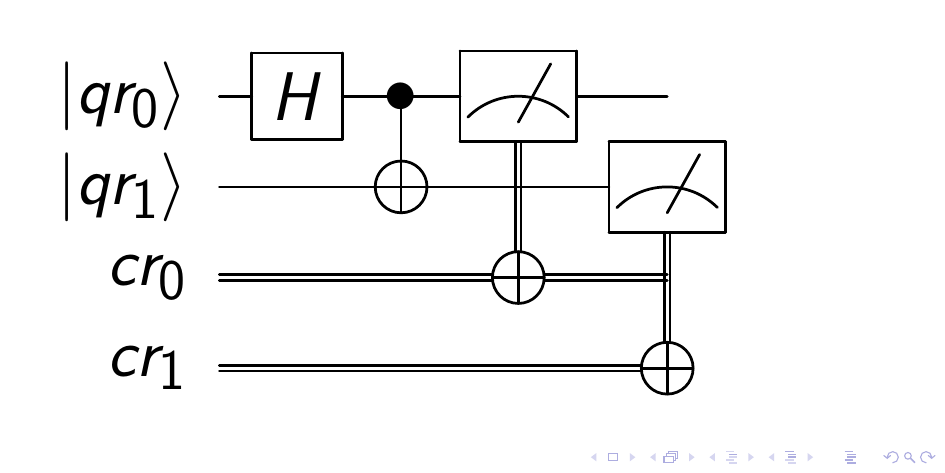

In [55]:
%load_ext autoreload
%autoreload 2
import utils

# Изобразим квантовую цепь, которая соответствует "Bell".
utils.circuitImage(qc, utils.basis)

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|} \newcommand{\braket}[2]{\left\langle{#1}\vert{#2}\right\rangle}$
Построенная квантовая цепь "Bell" соответствует **Белловскому состоянию**: $\ket{\Phi^+} = \frac{1}{\sqrt{2}}\left( \ket{00} + \ket{11} \right)$. Его называют максимально запутанным состоянием двух кубит.

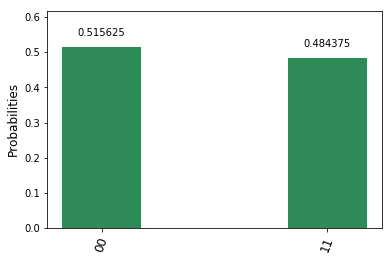

In [54]:
from qiskit.tools.visualization import plot_histogram

# Гистограмма распределения исходов.
plot_histogram(result.get_counts('Bell'))

In [57]:
# Чтобы посмотреть на названия квантовых цепей, которые
# есть в программе.
qp.get_circuit_names()

dict_keys(['Bell'])

In [60]:
# Посмотреть на программу в представлении OpenQASM -
# Open Quantum Assembly Language. Этот язык используется
# для описания инструкций к квантовой машине.
print(qp.get_qasm('Bell'))

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
h qr[0];
cx qr[0],qr[1];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



## Запуск на реальном устройстве

До этого программа запускалась на локальном симуляторе ("local_qasm_simulator"). Теперь же запустим на реальном квантовом чипе в облаке.

Для этого понадобится файл `Qconfig.py`, в котором должно находиться следующее:

```python
    APItoken = <YOUR API TOKEN>

    config = {
        'url': 'https://quantumexperience.ng.bluemix.net/api',
        # The following should only be needed for IBM Q users.
        'hub': 'MY_HUB',
        'group': 'MY_GROUP',
        'project': 'MY_PROJECT'
    }
```

Токен необходимо взять на сайте Q Experience: [IBMQX](https://quantumexperience.ng.bluemix.net) -> `My Account` -> `Advanced` -> `Copy API Token` (либо же сначала `Regenerate`)

In [61]:
import Qconfig

# Указываем APItoken и ссылку на соответствующий API.
qp.set_api(Qconfig.APItoken, Qconfig.config['url'])

In [62]:
# Список облачных устройств, которые подключены
# к сети.
qp.online_devices()

['ibmqx2', 'ibmqx5', 'ibmqx4', 'ibmqx_hpc_qasm_simulator']

In [66]:
# По названию устройства можно проверить
# его статус.
qp.get_backend_status('ibmqx5')

{'available': True, 'backend': 'ibmqx5', 'busy': False, 'pending_jobs': 0}

In [74]:
# Следующими строками можно найти доступный в настоящий момент времени
# квантовое устройство, которое имеет 5 кубит.

# Составляем список всех бэкэндов, убираем все симуляторы
# (это вызвано тем, что у них нет параметра 'n_qubits').
backends = list(filter(lambda x: 'simulator' not in x, qp.online_devices()))

real_device_backend = [backend for backend in backends if
                       qp.get_backend_configuration(backend)['n_qubits'] == 5 and
                       qp.get_backend_status(backend)['available'] == True]
real_device_backend

['ibmqx4']

In [75]:
backend = real_device_backend[0]

# Список из квантовых схем, которые хочется
# запустить на квантовом устройстве. Здесь
# может быть перечислено несколько схем,
# это будет оптимальнее запускать на сервере
# в том плане, что на сервере есть очередь
# на запуск.
circuits = ['Bell']

# Количество "запусков" программы на бэкэнде.
# Максимальное число равно 8192.
shots = 1024
# Максимальное число кредитов, которые вы
# готовы потратить за запуск программы.
max_credits = 3
# Через такие промежутки времени будем
# проверять - закончилось ли выполнение
# программы или нет.
wait_time = 10
# Максимальное время ожидания, после которого
# перестаём опрашивать сервер.
timeout = 600

# Отпраляем программы в облако и ожидаем выполнения.
result_real = qp.execute(circuits, backend=backend,
                         shots=shots, max_credits=max_credits,
                         wait=wait_time, timeout=timeout)

In [84]:
# Проверяем статус программы.
result_real.get_status()

'COMPLETED'

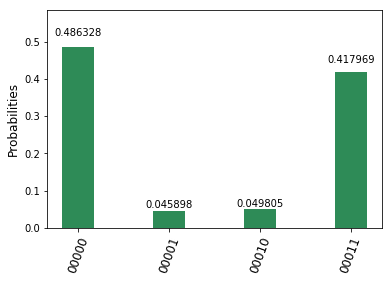

In [86]:
%%time
# Гистограмма распределения исходов
# на настоящем квантовом устройстве.
plot_histogram(result_real.get_counts('Bell'))

Про кредиты:

<img src='img/04_shots.jpg' width="250px">


<p style="text-align: center;">[Source](https://quantumexperience.ng.bluemix.net/qx/editor)</p>

## Реализация квантовых цепей

<img src="img/03_circuits.jpg" width="250px">

### Начнем с первой цепи

In [89]:
qc_1 = qp.create_circuit('qc_1', [qr], [cr])
qc_1.measure(qr[0], cr[0])

# Теперь заметим, что квантовая цепь "qc_1"
# добавилась к остальным.
qp.get_circuit_names()

dict_keys(['Bell', 'qc_1'])

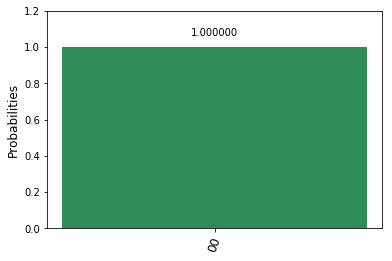

In [92]:
# Запустим на локальном симуляторе
# и построим гистограмму исходов.
result = qp.execute('qc_1')
plot_histogram(result.get_counts('qc_1'))

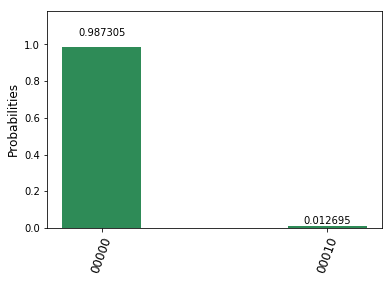

In [94]:
%%time
# Запустим ту же цепь на реальном устройстве.
result_real = qp.execute('qc_1', backend=backend,
                         shots=shots, max_credits=max_credits,
                         wait=wait_time, timeout=timeout)
plot_histogram(result_real.get_counts('qc_1'))

### Вторая цепь

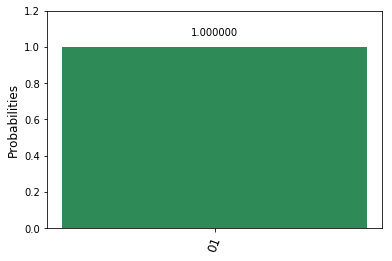

In [97]:
qc_2 = qp.create_circuit('qc_2', [qr], [cr])
# Добавляем NOT гейт.
qc_2.x(qr[0])
qc_2.measure(qr[0], cr[0])

result = qp.execute('qc_2')
plot_histogram(result.get_counts('qc_2'))

Можно заметить как "флипнулся" первый кубит.

### Третья цепь

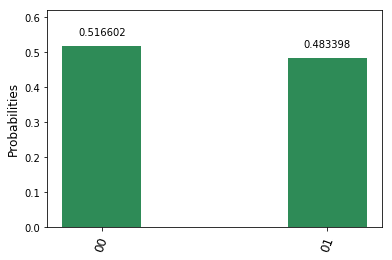

In [98]:
qc_3 = qp.create_circuit('qc_3', [qr], [cr])
# Добавляем гейт Адамара.
qc_3.h(qr[0])
qc_3.measure(qr[0], cr[0])

result = qp.execute('qc_3')
plot_histogram(result.get_counts('qc_3'))

### Вспомогательная цепь

Создадим отдельно квантовую цепь, которая будет состоять из гейта CNOT и измерений.

In [100]:
aux = qp.create_circuit('auxiliary', [qr], [cr])
aux.cx(qr[0], qr[1])
aux.measure(qr[0], cr[0])
aux.measure(qr[1], cr[1])

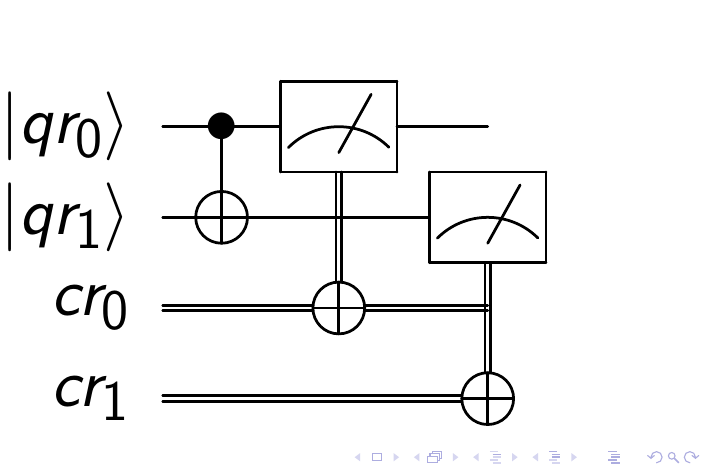

In [101]:
utils.circuitImage(aux, utils.basis)

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|} \newcommand{\braket}[2]{\left\langle{#1}\vert{#2}\right\rangle}$
$$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

Рассмотрим действие оператора $CNOT$ на двухкубитные состояния:

$CNOT \ket{00} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \ket{00}$

$CNOT \ket{01} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = \ket{01}$

$CNOT \ket{10} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \ket{11}$

$CNOT \ket{11} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \ket{10}$

### Теперь создадим четвёртую цепь

In [135]:
qc_4 = qp.create_circuit('qc_4_begin', [qr], [cr])
qc_4.x(qr[0])
qc_4.x(qr[1])

# Квантовые цепи можно "складывать" вместе,
# вернее, составлять.
qc_4 = qc_4 + aux

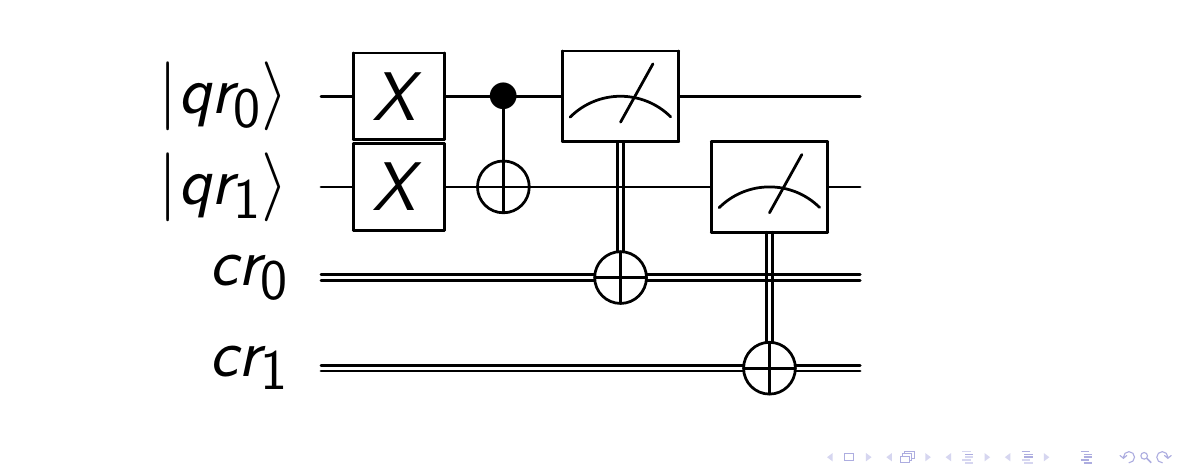

In [136]:
# Таким образом мы получаем четвертую
# квантовую цепь.
utils.circuitImage(qc_4, utils.basis)

In [137]:
# И записываем её в программу под соответствующим
# названием.
qp.add_circuit('qc_4', qc_4)

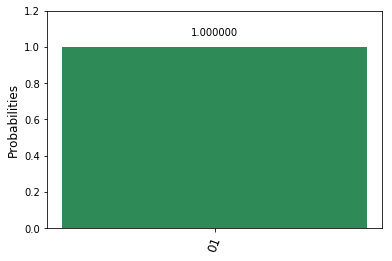

In [138]:
result = qp.execute('qc_4')
plot_histogram(result.get_counts('qc_4'))

### Пятая цепь

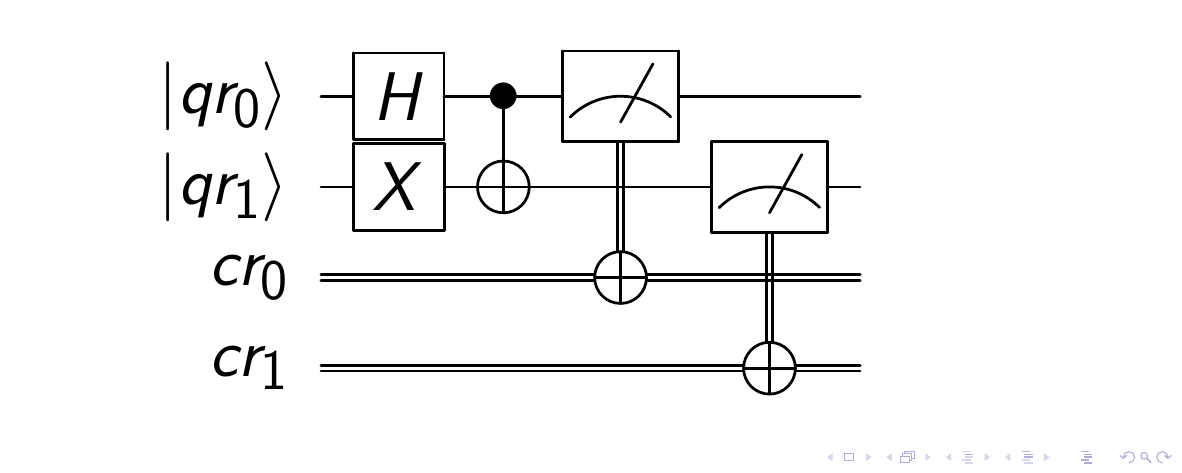

In [111]:
qc_5 = qp.create_circuit('qc_5_begin', [qr], [cr])
qc_5.h(qr[0])
qc_5.x(qr[1])

qc_5 = qc_5 + aux
qp.add_circuit('qc_5', qc_5)

utils.circuitImage(qp.get_circuit('qc_5'), utils.basis)

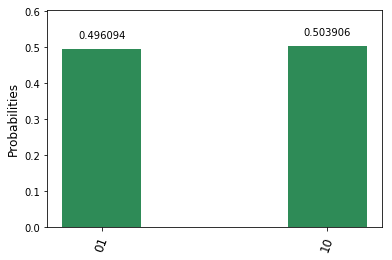

In [112]:
result = qp.execute('qc_5')
plot_histogram(result.get_counts('qc_5'))

## Набор гейтов не ограничивается гейтами H, X, CNOT
Есть ещё много других доступных гейтов, которые включают в себя операторы поворота и т.д.

<img src='img/01_gates.jpg'>

<p style="text-align: center;">[Source](https://github.com/QISKit/qiskit-tutorial/blob/master/1_introduction/beginners_guide_composer_examples.ipynb)</p>